In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
import tensorflow_hub as hub

In [2]:
INPUT_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=INPUT_SHAPE+(3, ))
])

In [3]:
import PIL.Image as Images 

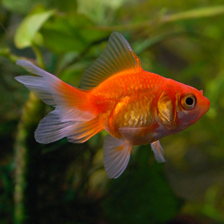

In [4]:
goldfish = Images.open("goldfish.jpg").resize(INPUT_SHAPE)
goldfish

In [5]:
goldfish = np.array(goldfish)/255.0

In [6]:
Image_prediction = classifier.predict(goldfish[np.newaxis, ...])

In [7]:
Image_prediction.shape

(1, 1001)

In [8]:
result = np.argmax(Image_prediction)

In [9]:
Image_labels = []
with open("ImageNetLabels.txt", 'r') as f:
    Image_labels = f.read().splitlines()
Image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
Image_labels[result]

'goldfish'

# TRANSFER LEARNING WITH FLOWER IMAGES

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

In [12]:
import pathlib 
data_dir = pathlib.Path(data_dir)

In [13]:
 plant = {
        'roses': list(data_dir.glob('roses/*')),
        'dandelion': list(data_dir.glob('dandelion/*')),
        'daisy': list(data_dir.glob('daisy/*')),
        'sunflowers': list(data_dir.glob('sunflowers/*')),
        'tulips': list(data_dir.glob('tulips/*'))
    }

plant_index = {
    'roses': 0,
    'dandelion': 1,
    'daisy': 2,
    'sunflowers': 3,
    'tulips': 4,
    
}

In [14]:
import cv2

In [15]:
X,y = [],[]
for flower_names, images in plant.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(plant_index[flower_names])

In [16]:
X = np.array(X)
y = np.array(y)

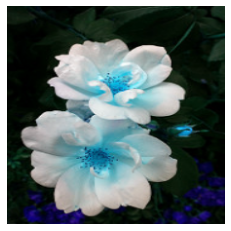

In [17]:
%matplotlib inline
plt.axis('off')
plt.imshow(X[0])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [19]:
X_train = X_train/255
y_train = y_train/255

In [20]:
#predicted = classifier.predict(np.array(X[0]))

ValueError: in user code:

    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow_hub\keras_layer.py:237 call  *
        result = smart_cond.smart_cond(training,
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\saved_model\load.py:664 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\def_function.py:885 __call__
        result = self._call(*args, **kwds)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\def_function.py:924 _call
        results = self._stateful_fn(*args, **kwds)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\function.py:3038 __call__
        filtered_flat_args) = self._maybe_define_function(args, kwargs)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\function.py:3463 _maybe_define_function
        graph_function = self._create_graph_function(args, kwargs)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\function.py:3308 _create_graph_function
        capture_by_value=self._capture_by_value),
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\framework\func_graph.py:1007 func_graph_from_py_func
        func_outputs = python_func(*func_args, **func_kwargs)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\eager\def_function.py:668 wrapped_fn
        out = weak_wrapped_fn().__wrapped__(*args, **kwds)
    C:\Users\Godfred\Anaconda3\envs\Tensorflow\lib\site-packages\tensorflow\python\saved_model\function_deserialization.py:294 restored_function_body
        "\n\n".join(signature_descriptions)))

    ValueError: Could not find matching function to call loaded from the SavedModel. Got:
      Positional arguments (4 total):
        * Tensor("inputs:0", shape=(32, 224, 3), dtype=float32)
        * False
        * False
        * 0.99
      Keyword arguments: {}
    
    Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 2:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * True
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 3:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * False
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}
    
    Option 4:
      Positional arguments (4 total):
        * TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='inputs')
        * False
        * True
        * TensorSpec(shape=(), dtype=tf.float32, name='batch_norm_momentum')
      Keyword arguments: {}


In [21]:
feature_extractor = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", input_shape=INPUT_SHAPE+(3, ), trainable = False)
])

In [22]:
model_trans_learning = Sequential([
    feature_extractor, 
    layers.Dense(5)
])

model_trans_learning.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
model_trans_learning.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)


model_trans_learning.fit(X_train, y_train, epochs = 5)

Epoch 1/5
92/92 [==============================] - 248s 2s/step - loss: 0.0710 - accuracy: 0.1655
Epoch 2/5
92/92 [==============================] - 105s 1s/step - loss: 4.7684e-07 - accuracy: 0.1672
Epoch 3/5
92/92 [==============================] - 104s 1s/step - loss: 4.7684e-07 - accuracy: 0.1672
Epoch 4/5
92/92 [==============================] - 103s 1s/step - loss: 4.7684e-07 - accuracy: 0.1672
Epoch 5/5
92/92 [==============================] - 104s 1s/step - loss: 4.7684e-07 - accuracy: 0.1672


In [24]:
model_trans_learning.evaluate(X_test, y_test)

23/23 [==============================] - 50s 823ms/step - loss: 12.8242 - accuracy: 0.2044


[12.82420539855957, 0.20435968041419983]